Current portfolio holding(24 stocks) as per the sheet provided by Professor John Longo:( sequence of weights same as the provided in the list)
['WSM', 'PG', 'UL', 'PSX','VLO','BAC', 'BLK', 'C', 'GS', 'JPM','LAZ','PNC','MDT','PFE','JCI','CF','BABA' ,'AAPL' ,'INFY', 'META' ,'MSFT','QCOM','DAL','UNP']
What is part of code :
1. Downloaded the company data of 24 stock held in January 2024 as per the sequence in pdf for feasibility of understanding
2. Correlation heatmap and pairplot between stocks daily returns plotted ( takes time to load as stocks are large in number)
3. Plot financial data : daily returns plot; portfolio returns plot
4. PLot individual stock returns ( plots are interactive; in side bar stock tickers can be clicked to remove the stock temporary; chart can be zoomed for different time interval 
5. Weight generation and asset allocation for highest sharpe ratio
6. Monte Carlo simulation runned to get different sharpe ratios for various weights distribution  (3000 simulations runned for sample )
7. Find optimal portfolio allocation -----> Weights for every stock for the highest sharpe ratio among all the runned simulations
8. Plot on effecient frontier curve (Dark red dot is the optimal portfolio); 
9. Run the future value of optimal portfolio using Monte Carlo simulations to forecast the portfolio value over next 1 year
10. Prediction interval for 5% and 10% interval, median price and expected returns are calculated

Assumptions : 
1. Portfolio is historically tested over this time frame [2018-01-01 -   till date] ( dates can be easily changed at start if required)
2. All 24 stocks were hold from start date and will be hold till 1 year from here and no new stocks are added.


Flexibility options :
1. Can change the number of simulations for better output
2. Start and end date can be changed
3. Weights as per current protfolio can be added to check current weights based portfolio assessment
4. Stocks can be easily added or deleted ( can be done in Tickers )
5. Weights for different sharpe ratio, volatility and returns can be assessed too
6. Forecast can be extended to more than 1 year -----> change number of 'days'= 250 (at current) in last part of code eg. 500 for 2 years forecast

Advantage : 
1. Code cam ne used effectively in future if portfolio stocks and weights are changed by adjusting the changes initially and running the whole code again

In [52]:
# Import key librares and modules 
import pandas as pd
import numpy as np

# Import datetime module that comes pre-installed in Python 
# datetime offers classes that work with date & time information
import datetime as dt

In [53]:
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

In [70]:
import pandas as pd
import yfinance as yf

# Override the pandas_datareader's get_data_yahoo method with yfinance's version
yf.pdr_override()

# Indicate the start and end dates
start_date = pd.to_datetime('2018-01-01')
#end_date = pd.to_datetime('now')
end_date = pd.to_datetime('2023-12-31')
# List of ticker symbols
tickers = ['WSM', 'PG', 'UL', 'PSX', 'VLO', 'BAC', 'BLK', 'C', 'GS', 'JPM','LAZ','PNC','MDT','PFE','JCI','CF','BABA' ,'AAPL' ,
           'INFY', 'META' ,'MSFT','QCOM','DAL','UNP']

# Fetch the adjusted close for all the tickers
adj_close_df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Show the adjusted close data
adj_close_df.head()  # Show only the first 5 rows
adj_close_df.info()

[*********************100%%**********************]  24 of 24 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2018-01-02 to 2023-12-29
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1509 non-null   float64
 1   BABA    1509 non-null   float64
 2   BAC     1509 non-null   float64
 3   BLK     1509 non-null   float64
 4   C       1509 non-null   float64
 5   CF      1509 non-null   float64
 6   DAL     1509 non-null   float64
 7   GS      1509 non-null   float64
 8   INFY    1509 non-null   float64
 9   JCI     1509 non-null   float64
 10  JPM     1509 non-null   float64
 11  LAZ     1509 non-null   float64
 12  MDT     1509 non-null   float64
 13  META    1509 non-null   float64
 14  MSFT    1509 non-null   float64
 15  PFE     1509 non-null   float64
 16  PG      1509 non-null   float64
 17  PNC     1509 non-null   float64
 18  PSX     1509 non-null   float64
 19  QCOM    1509 non-null 

In [71]:
daily_returns_df = adj_close_df.iloc[:, :].pct_change() * 100
daily_returns_df.replace(np.nan, 0, inplace = True)
daily_returns_df.reset_index(inplace=True)
daily_returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1509 non-null   datetime64[ns]
 1   AAPL    1509 non-null   float64       
 2   BABA    1509 non-null   float64       
 3   BAC     1509 non-null   float64       
 4   BLK     1509 non-null   float64       
 5   C       1509 non-null   float64       
 6   CF      1509 non-null   float64       
 7   DAL     1509 non-null   float64       
 8   GS      1509 non-null   float64       
 9   INFY    1509 non-null   float64       
 10  JCI     1509 non-null   float64       
 11  JPM     1509 non-null   float64       
 12  LAZ     1509 non-null   float64       
 13  MDT     1509 non-null   float64       
 14  META    1509 non-null   float64       
 15  MSFT    1509 non-null   float64       
 16  PFE     1509 non-null   float64       
 17  PG      1509 non-null   float64       
 18  PNC     

In [72]:
daily_returns_df

Date      AAPL      BABA       BAC       BLK         C        CF  \
0    2018-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    2018-01-03 -0.017427  0.190585 -0.334456  1.055082  0.309303  0.023170   
2    2018-01-04  0.464531  0.929356  1.308730  1.320131  1.233440  1.042873   
3    2018-01-05  1.138514  2.686978  0.463748  0.851991 -0.132436  0.160562   
4    2018-01-08 -0.371435 -0.194025 -0.692389  0.745868 -1.166982 -2.175406   
...         ...       ...       ...       ...       ...       ...       ...   
1504 2023-12-22 -0.554743 -1.285082  0.692767  0.415472  0.513833  0.776640   
1505 2023-12-26 -0.284092  0.757173  1.286276  0.522166  0.943771  0.248609   
1506 2023-12-27  0.051790  0.342785 -0.059076  0.823200  0.233729 -0.173590   
1507 2023-12-28  0.222628  1.484690  0.118210  0.142636  0.116603 -1.055770   
1508 2023-12-29 -0.542411  0.349565 -0.619844 -0.320474 -0.155285 -0.200850   

           DAL        GS      INFY  ...      MSFT       PFE        PG  \
0     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    -1.850559 -0.930895 -0.859412  ...  0.465418  0.740960 -0.121342   
2     0.000000  1.397601 -0.619212  ...  0.880124  0.217930  0.706891   
3     0.502788 -0.510047  1.869174  ...  1.239816  0.190268  0.065760   
4    -2.304795 -1.451937  0.795101  ...  0.102043 -1.112330  0.526118   
...        ...       ...       ...  ...       ...       ...       ...   
1504  0.024326  0.021013  1.901143  ...  0.278411  0.317913  0.707055   
1505 -0.899596  0.252201 -1.652449  ...  0.021361  0.035210  0.454303   
1506 -0.417069  0.752082  0.813006  ... -0.157473  0.703984  0.082226   
1507  0.098548  0.501975 -0.215059  ...  0.323460  0.629146 -0.225943   
1508 -0.984497 -0.165628 -0.969829  ...  0.202518  0.000000  0.555822   

           PNC       PSX      QCOM        UL       UNP       VLO       WSM  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1    -0.020708  0.668307  1.134990 -0.127606  0.559737  0.528038  0.683092  
2     0.006900 -0.273359  0.136473  0.602402 -0.541973  0.321547 -0.716155  
3     0.124487  0.009797  0.666367  0.780255  1.273916  0.470163  1.176931  
4     0.186478 -0.097898 -0.300901  0.162044  1.388778  0.202039  1.181975  
...        ...       ...       ...       ...       ...       ...       ...  
1504  0.461224 -0.171258  0.737152  0.543470  0.607165  0.212242 -0.581163  
1505  1.069061  1.238248  1.372924  0.062378  0.702019  0.748873 -0.392990  
1506  0.584036 -0.751545  0.178741  0.540204  0.212001 -1.028603  0.310693  
1507  0.406450 -1.380852  0.096068  0.185989  0.085432 -1.312404 -0.044246  
1508 -0.501182  0.225838 -0.843265  0.000000 -0.162596 -0.069174 -0.752541  

[1509 rows x 25 columns]

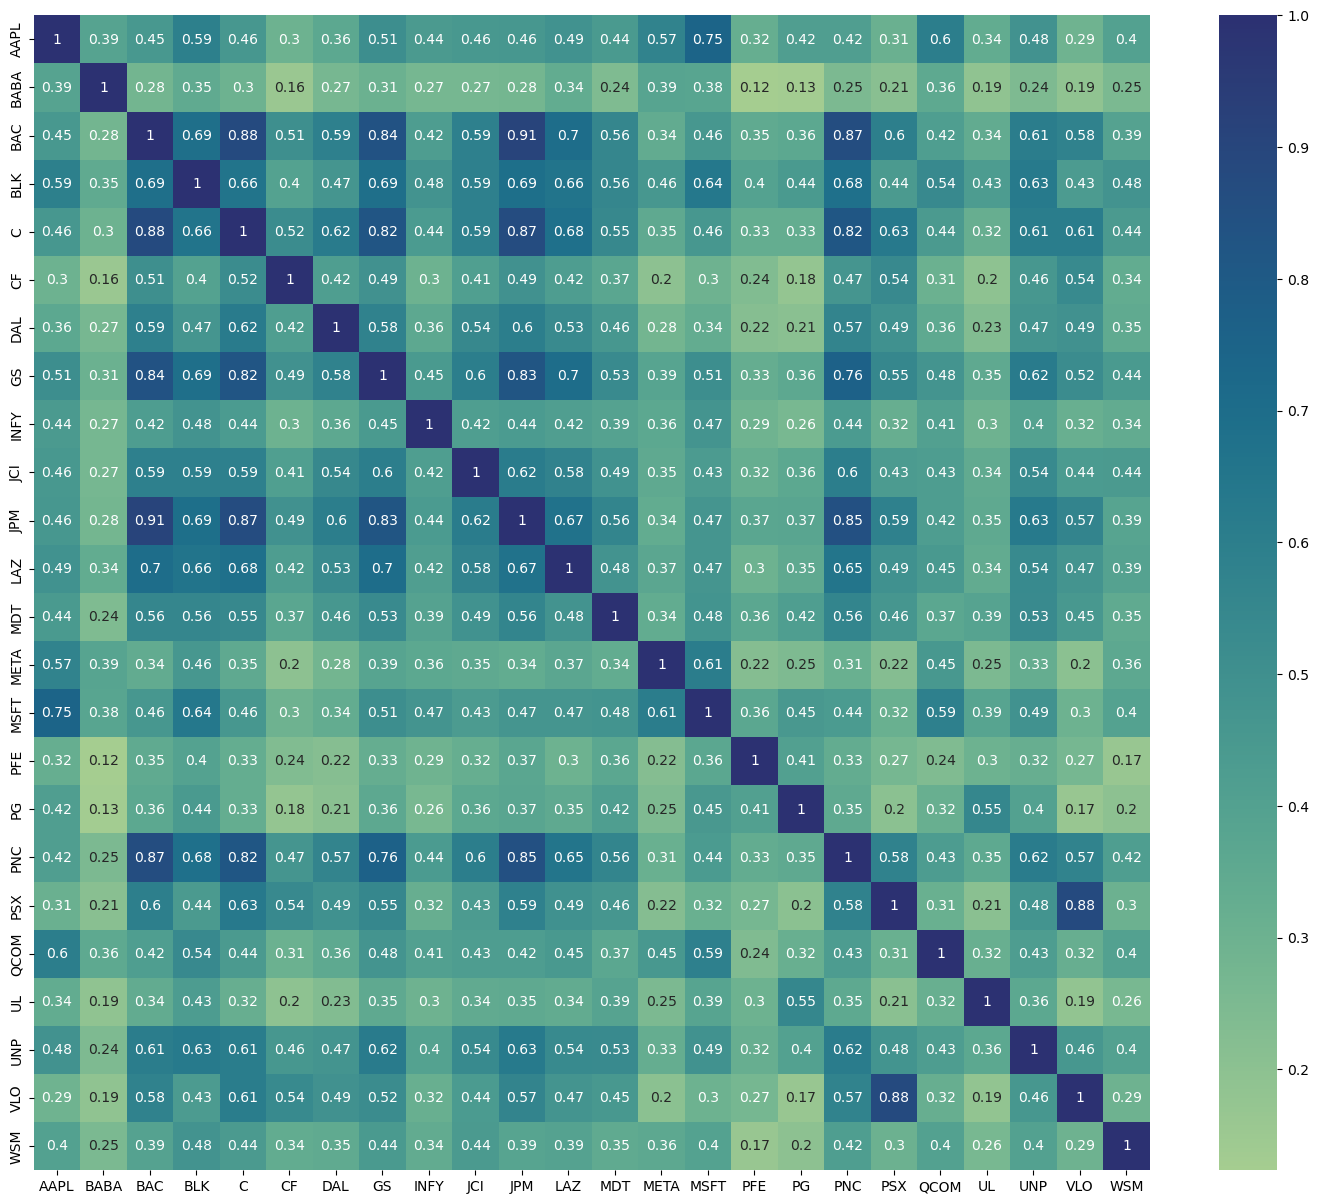

In [73]:
# Plot a heatmap showing the correlations between daily returns

plt.figure(figsize = (18, 15))
sns.heatmap(daily_returns_df.drop(columns = ['Date']).corr(), annot = True, cmap ="crest");


In [74]:
adj_close_df.reset_index(inplace=True)
adj_close_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1509 non-null   datetime64[ns]
 1   AAPL    1509 non-null   float64       
 2   BABA    1509 non-null   float64       
 3   BAC     1509 non-null   float64       
 4   BLK     1509 non-null   float64       
 5   C       1509 non-null   float64       
 6   CF      1509 non-null   float64       
 7   DAL     1509 non-null   float64       
 8   GS      1509 non-null   float64       
 9   INFY    1509 non-null   float64       
 10  JCI     1509 non-null   float64       
 11  JPM     1509 non-null   float64       
 12  LAZ     1509 non-null   float64       
 13  MDT     1509 non-null   float64       
 14  META    1509 non-null   float64       
 15  MSFT    1509 non-null   float64       
 16  PFE     1509 non-null   float64       
 17  PG      1509 non-null   float64       
 18  PNC     

In [103]:
# plot line chart df enter stock file and title to enter title
# example to plot....  plot_financial_data(stock_df.iloc[:,[0,7]], 'Amazon.com, Inc. (AMZN) Percentage Daily Return [%]')
def plot_financial_data(df, title,  width=800, height=3000):
    
    fig = px.line(title = title)
    
    # For loop that plots all stock prices in the pandas dataframe df
    # Note that index starts with 1 because we want to skip the date column
    
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        fig.update_traces(line_width = 1)
        fig.update_layout({'plot_bgcolor': "white"})

    fig.show()

In [76]:
# Function to scale stock prices based on their initial starting price
# The objective of this function is to set all prices to start at a value of 1 
def price_scaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[1:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

# Working on price scaling

# x = price_scaling(close_price_df)
# y = x.iloc[:,1:].pct_change()*100
# y.fillna(0, inplace =True)
# y.insert(0,'Date',x['Date'])

In [77]:
# Let's create an array that holds random portfolio weights
# Note that portfolio weights must add up to 1 
import random

def generate_portfolio_weights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
        
    # let's make the sum of all weights add up to 1
    weights = weights/np.sum(weights)
    return weights

# Call the function (Run this cell multiple times to generate different outputs)
# weights = generate_portfolio_weights(10)      if 10 stocks in portfolio


In [78]:
# Assume equal weights allocation
weights_equal = np.ones(24) * 0.0416667
weights_equal 

array([0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667,
       0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667,
       0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667,
       0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667, 0.0416667])

In [79]:
# Assume that we have $1,000,000 that we would like to invest in one or more of the selected stocks
# Let's create a function that receives the following arguments: 
      # (1) Stocks closing prices
      # (2) Random weights 
      # (3) Initial investment amount
# The function will return a DataFrame that contains the following:
      # (1) Daily value (position) of each individual stock over the specified time period
      # (2) Total daily value of the portfolio 
      # (3) Percentage daily return 

def asset_allocation(df, weights, initial_investment):
    portfolio_df = df.copy()

    # Scale stock prices using the "price_scaling" function that we defined earlier (Make them all start at 1)
    scaled_df = price_scaling(df)
  
    for i, stock in enumerate(scaled_df.columns[1:]):
        portfolio_df[stock] = scaled_df[stock] * weights[i] * initial_investment

    # Sum up all values and place the result in a new column titled "portfolio value [$]" 
    # Note that we excluded the date column from this calculation
    portfolio_df['Portfolio Value [$]'] = portfolio_df[portfolio_df != 'Date'].sum(axis = 1, numeric_only = True)
            
    # Calculate the portfolio percentage daily return and replace NaNs with zeros
    portfolio_df['Portfolio Daily Return [%]'] = portfolio_df['Portfolio Value [$]'].pct_change(1) * 100 
    portfolio_df.replace(np.nan, 0, inplace = True)
    
    return portfolio_df

In [80]:
# Now let's put this code in a function and generate random weights
# Let's obtain the number of stocks under consideration (note that we ignored the "Date" column) 
n = len(adj_close_df.columns)-1

# Let's generate random weights 
print('Number of stocks under consideration = {}'.format(n))
weights = generate_portfolio_weights(n).round(6)
print('Portfolio weights = {}'.format(weights))

# Let's test out the "asset_allocation" function
portfolio_df = asset_allocation(adj_close_df, weights, 1000000)
portfolio_df.round(2)

Number of stocks under consideration = 24
Portfolio weights = [0.052258 0.028487 0.065457 0.006423 0.006242 0.039825 0.069645 0.046486
 0.027064 0.061018 0.012228 0.059413 0.069166 0.052567 0.050512 0.03591
 0.027765 0.049623 0.02458  0.065534 0.063263 0.015462 0.043488 0.027583]


Date       AAPL      BABA       BAC       BLK        C        CF  \
0    2018-01-02   52258.00  28487.00  65457.00   6423.00  6242.00  39825.00   
1    2018-01-03   52248.89  28541.29  65238.08   6490.77  6261.31  39834.23   
2    2018-01-04   52491.61  28806.54  66091.87   6576.45  6338.54  40249.65   
3    2018-01-05   53089.23  29580.57  66398.37   6632.49  6330.14  40314.27   
4    2018-01-08   52892.04  29523.17  65938.63   6681.95  6256.27  39437.27   
...         ...        ...       ...       ...       ...      ...       ...   
1504 2023-12-22  248438.97  11834.08  84176.41  11838.38  5236.28  86505.80   
1505 2023-12-26  247733.18  11923.69  85259.16  11900.20  5285.70  86720.86   
1506 2023-12-27  247861.48  11964.56  85208.79  11998.16  5298.05  86570.32   
1507 2023-12-28  248413.29  12142.20  85309.51  12015.28  5304.23  85656.34   
1508 2023-12-29  247065.87  12184.64  84780.73  11976.77  5295.99  85484.30   

           DAL        GS      INFY  ...        PG       PNC       PSX  \
0     69645.00  46486.00  27064.00  ...  27765.00  49623.00  24580.00   
1     68356.18  46053.26  26831.41  ...  27731.31  49612.72  24744.27   
2     68356.18  46696.91  26665.27  ...  27927.34  49616.15  24676.63   
3     68699.86  46458.73  27163.69  ...  27945.70  49677.91  24679.05   
4     67116.47  45784.18  27379.66  ...  28092.73  49770.55  24654.89   
...        ...       ...       ...  ...       ...       ...       ...   
1504  53784.50  79017.97  73107.04  ...  52281.23  64063.23  41310.07   
1505  53300.66  79217.25  71898.98  ...  52518.75  64748.11  41821.59   
1506  53078.36  79813.03  72483.52  ...  52561.93  65126.26  41507.29   
1507  53130.66  80213.67  72327.64  ...  52443.17  65390.97  40934.13   
1508  52607.59  80080.82  71626.19  ...  52734.66  65063.24  41026.58   

           QCOM        UL       UNP       VLO        WSM  Portfolio Value [$]  \
0      65534.00  63263.00  15462.00  43488.00   27583.00            999999.00   
1      66277.80  63182.27  15548.55  43717.63   27771.42           1004986.25   
2      66368.26  63562.88  15464.28  43858.21   27572.53           1011839.84   
3      66810.51  64058.84  15661.28  44064.41   27897.04           1016486.32   
4      66609.48  64162.64  15878.78  44153.44   28226.78           1014717.79   
...         ...       ...       ...       ...        ...                  ...   
1504  170338.16  68236.11  31606.21  80321.56  123962.19           1921538.85   
1505  172676.78  68278.67  31828.09  80923.07  123475.04           1927976.21   
1506  172985.42  68647.52  31895.57  80090.69  123858.66           1931159.70   
1507  173151.60  68775.19  31922.82  79039.58  123803.86           1931432.63   
1508  171691.48  68775.19  31870.91  78984.90  122872.19           1924042.44   

      Portfolio Daily Return [%]  
0                           0.00  
1                           0.50  
2                           0.68  
3                           0.46  
4                          -0.17  
...                          ...  
1504                        0.23  
1505                        0.34  
1506                        0.17  
1507                        0.01  
1508                       -0.38  

[1509 rows x 27 columns]

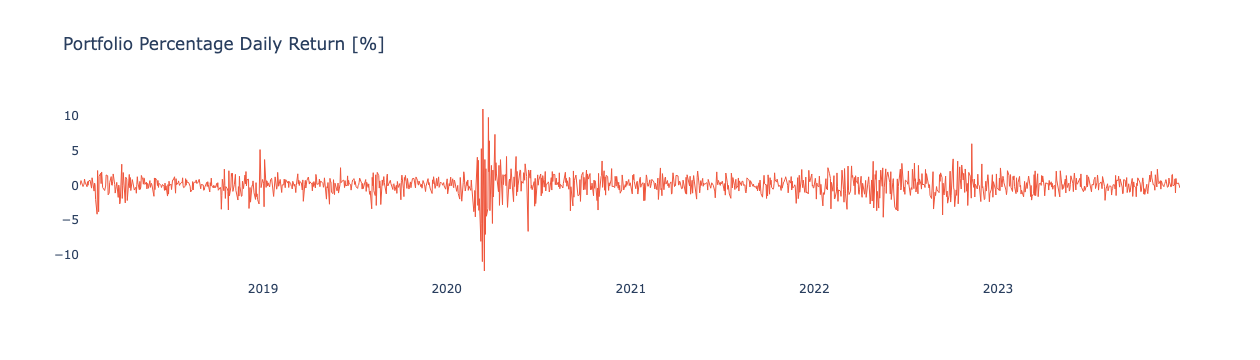

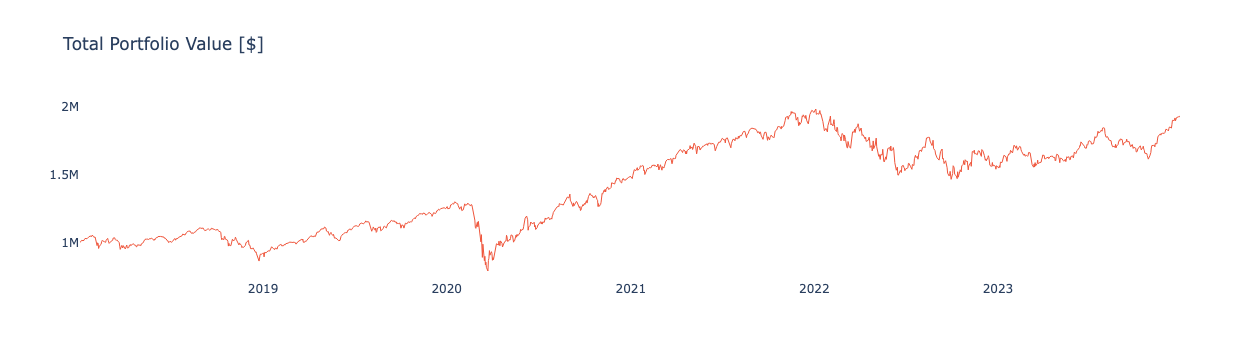

In [104]:
# Plot the portfolio percentage daily return
plot_financial_data(portfolio_df[['Date', 'Portfolio Daily Return [%]']], 'Portfolio Percentage Daily Return [%]')

# Plot the total daily value of the portfolio (sum of all positions)
plot_financial_data(portfolio_df[['Date', 'Portfolio Value [$]']], 'Total Portfolio Value [$]')


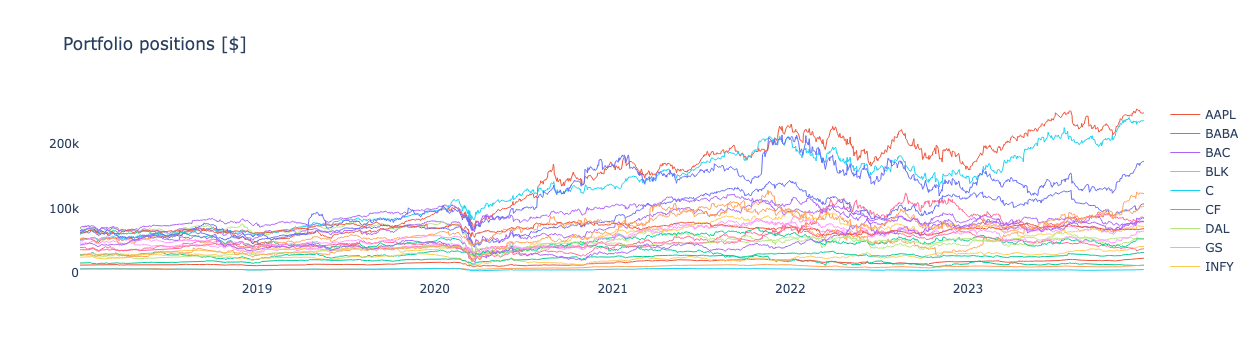

In [105]:
# Plot each stock position in our portfolio over time
# This graph shows how our initial investment in each individual stock grows over time
plot_financial_data(portfolio_df.drop(['Portfolio Value [$]', 'Portfolio Daily Return [%]'], axis = 1), 'Portfolio positions [$]')


In [106]:
# Let's define the simulation engine function 
# The function receives: 
    # (1) portfolio weights
    # (2) initial investment amount
# The function performs asset allocation and calculates portfolio statistical metrics including Sharpe ratio
# The function returns: 
    # (1) Expected portfolio return 
    # (2) Expected volatility 
    # (3) Sharpe ratio 
    # (4) Return on investment 
    # (5) Final portfolio value in dollars


def simulation_engine(weights, initial_investment):
    # Perform asset allocation using the random weights (sent as arguments to the function)
    portfolio_df = asset_allocation(adj_close_df, weights, initial_investment)
  
    # Calculate the return on the investment 
    # Return on investment is calculated using the last final value of the portfolio compared to its initial value
    return_on_investment = ((portfolio_df['Portfolio Value [$]'][-1:] - 
                             portfolio_df['Portfolio Value [$]'][0])/ 
                             portfolio_df['Portfolio Value [$]'][0]) * 100
  
    # Daily change of every stock in the portfolio (Note that we dropped the date, portfolio daily worth and daily % returns) 
    portfolio_daily_return_df = portfolio_df.drop(columns = ['Date', 'Portfolio Value [$]', 'Portfolio Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1) 
  
    # Portfolio Expected Return formula
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean() ) * 252
  
    # Portfolio volatility (risk) formula
    # The risk of an asset is measured using the standard deviation which indicates the dispertion away from the mean
    # The risk of a portfolio is not a simple sum of the risks of the individual assets within the portfolio
    # Portfolio risk must consider correlations between assets within the portfolio which is indicated by the covariance 
    # The covariance determines the relationship between the movements of two random variables
    # When two stocks move together, they have a positive covariance when they move inversely, the have a negative covariance 

    covariance = portfolio_daily_return_df.cov() * 252 
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    # Check out the chart for the 10-years U.S. treasury at https://ycharts.com/indicators/10_year_treasury_rate
    rf = 0.04 # Try to set the risk free rate of return to 1% (assumption)

    # Calculate Sharpe ratio
    sharpe_ratio = (expected_portfolio_return - rf)/expected_volatility 
    return expected_portfolio_return, expected_volatility, sharpe_ratio, portfolio_df['Portfolio Value [$]'][-1:].values[0], return_on_investment.values[0]
  

In [107]:
# Let's test out the "simulation_engine" function and print out statistical metrics
# Define the initial investment amount
initial_investment = 1000000
portfolio_metrics = simulation_engine(weights, initial_investment)

In [108]:
print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))


Expected Portfolio Annual Return = 14.43%
Portfolio Standard Deviation (Volatility) = 23.25%
Sharpe Ratio = 0.49
Portfolio Final Value = $1924042.44
Return on Investment = 92.40%


In [109]:
# Set the number of simulation runs
sim_runs = 3000

initial_investment = 1000000

# Placeholder to store all weights
weights_runs = np.zeros((sim_runs, n))

# Placeholder to store all Sharpe ratios
sharpe_ratio_runs = np.zeros(sim_runs)

# Placeholder to store all expected returns
expected_portfolio_returns_runs = np.zeros(sim_runs)

# Placeholder to store all volatility values
volatility_runs = np.zeros(sim_runs)

# Placeholder to store all returns on investment
return_on_investment_runs = np.zeros(sim_runs)

# Placeholder to store all final portfolio values
final_value_runs = np.zeros(sim_runs)

for i in range(sim_runs):
    # Generate random weights 
    weights = generate_portfolio_weights(n)
    # Store the weights
    weights_runs[i,:] = weights
    
    # Call "simulation_engine" function and store Sharpe ratio, return and volatility
    # Note that asset allocation is performed using the "asset_allocation" function  
    expected_portfolio_returns_runs[i], volatility_runs[i], sharpe_ratio_runs[i], final_value_runs[i], return_on_investment_runs[i] = simulation_engine(weights, initial_investment)
    print("Simulation Run = {}".format(i))   
    print("Weights = {}, Final Value = ${:.2f}, Sharpe Ratio = {:.2f}".format(weights_runs[i].round(3), final_value_runs[i], sharpe_ratio_runs[i]))   
    print('\n')


Simulation Run = 0
Weights = [0.003 0.062 0.051 0.02  0.046 0.083 0.028 0.02  0.    0.047 0.079 0.059
 0.085 0.026 0.048 0.029 0.071 0.032 0.018 0.036 0.003 0.071 0.002 0.08 ], Final Value = $1917501.23, Sharpe Ratio = 0.48


Simulation Run = 1
Weights = [0.013 0.051 0.073 0.077 0.004 0.013 0.019 0.059 0.057 0.048 0.026 0.017
 0.069 0.055 0.075 0.044 0.055 0.029 0.009 0.075 0.043 0.033 0.017 0.037], Final Value = $2020590.73, Sharpe Ratio = 0.54


Simulation Run = 2
Weights = [0.026 0.035 0.017 0.022 0.028 0.012 0.073 0.085 0.053 0.027 0.062 0.047
 0.084 0.046 0.019 0.007 0.079 0.024 0.02  0.016 0.015 0.068 0.055 0.08 ], Final Value = $1949858.87, Sharpe Ratio = 0.51


Simulation Run = 3
Weights = [0.047 0.026 0.016 0.05  0.009 0.019 0.01  0.037 0.081 0.089 0.021 0.029
 0.05  0.048 0.081 0.017 0.042 0.036 0.077 0.088 0.014 0.087 0.018 0.008], Final Value = $2199454.55, Sharpe Ratio = 0.61


Simulation Run = 4
Weights = [0.062 0.021 0.03  0.033 0.074 0.07  0.059 0.022 0.051 0.041 0.03  

In [110]:
#returns max sharpe ratio
sharpe_ratio_runs.max().round(4)


0.6551

In [111]:
# Return the index of the maximum Sharpe ratio (Best simulation run) 
sharpe_ratio_runs.argmax()

732

In [112]:
# Obtain the portfolio weights that correspond to the maximum Sharpe ratio (Golden set of weights!)
weights_runs[sharpe_ratio_runs.argmax(), :]

array([0.07796177, 0.0282814 , 0.01174353, 0.01938229, 0.01168823,
       0.04882443, 0.03725702, 0.00788388, 0.04355238, 0.08004643,
       0.09002744, 0.00671471, 0.02659635, 0.01350669, 0.07828032,
       0.06389932, 0.02682358, 0.00093748, 0.0129168 , 0.01010303,
       0.07001875, 0.07593727, 0.06320018, 0.09441674])

In [113]:
sharpe_ratio_runs.min()

0.34499140431116027

In [114]:
# Return Sharpe ratio, volatility corresponding to the best weights allocation (maximum Sharpe ratio)
optimal_portfolio_return, optimal_volatility, optimal_sharpe_ratio, highest_final_value, optimal_return_on_investment = simulation_engine(weights_runs[sharpe_ratio_runs.argmax(), :], initial_investment)

#new

In [115]:
print('Best Portfolio Metrics Based on {} Monte Carlo Simulation Runs:'.format(sim_runs))
print('  - Portfolio Expected Annual Return = {:.02f}%'.format(optimal_portfolio_return * 100))
print('  - Portfolio Standard Deviation (Volatility) = {:.02f}%'.format(optimal_volatility * 100))
print('  - Sharpe Ratio = {:.02f}'.format(optimal_sharpe_ratio))
print('  - Final Value = ${:.02f}'.format(highest_final_value))
print('  - Return on Investment = {:.02f}%'.format(optimal_return_on_investment))

Best Portfolio Metrics Based on 3000 Monte Carlo Simulation Runs:
  - Portfolio Expected Annual Return = 17.56%
  - Portfolio Standard Deviation (Volatility) = 22.23%
  - Sharpe Ratio = 0.66
  - Final Value = $2377968.96
  - Return on Investment = 137.80%


In [116]:
# Create a DataFrame that contains volatility, return, and Sharpe ratio for all simualation runs
sim_out_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist() })
sim_out_df

Volatility  Portfolio_Return  Sharpe_Ratio
0       0.234342          0.142994      0.482176
1       0.223739          0.149999      0.536336
2       0.235233          0.149196      0.506717
3       0.227344          0.168452      0.608998
4       0.233358          0.155941      0.539692
...          ...               ...           ...
2995    0.235972          0.144499      0.485222
2996    0.243624          0.152406      0.502439
2997    0.235956          0.147283      0.497053
2998    0.247709          0.137363      0.433423
2999    0.243516          0.151203      0.497719

[3000 rows x 3 columns]

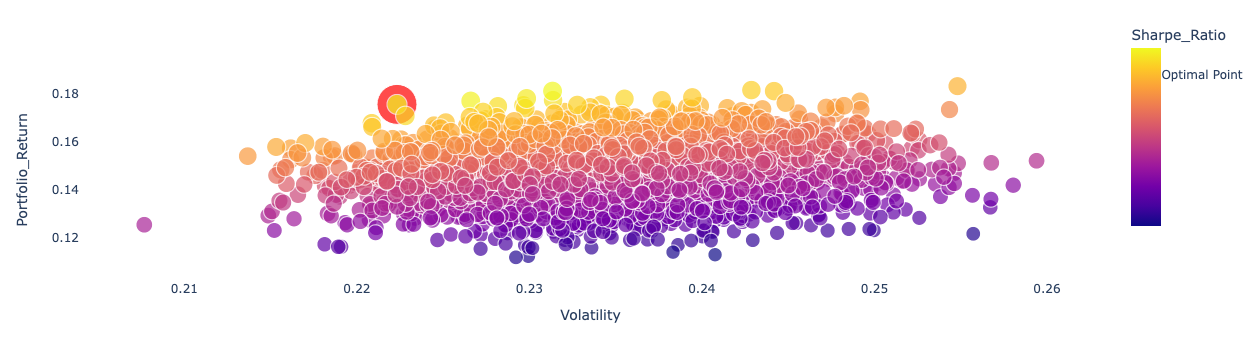

In [117]:
# Let's highlight the point with the highest Sharpe ratio
import plotly.graph_objects as go
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.add_trace(go.Scatter(x = [optimal_volatility], y = [optimal_portfolio_return], mode = 'markers', name = 'Optimal Point', marker = dict(size=[40], color = 'red')))
fig.update_layout(coloraxis_colorbar = dict(y = 0.7, dtick = 5))
fig.update_layout({'plot_bgcolor': "white"})
fig.show()

# Effective frontier curve ; highest sharpe ratio 

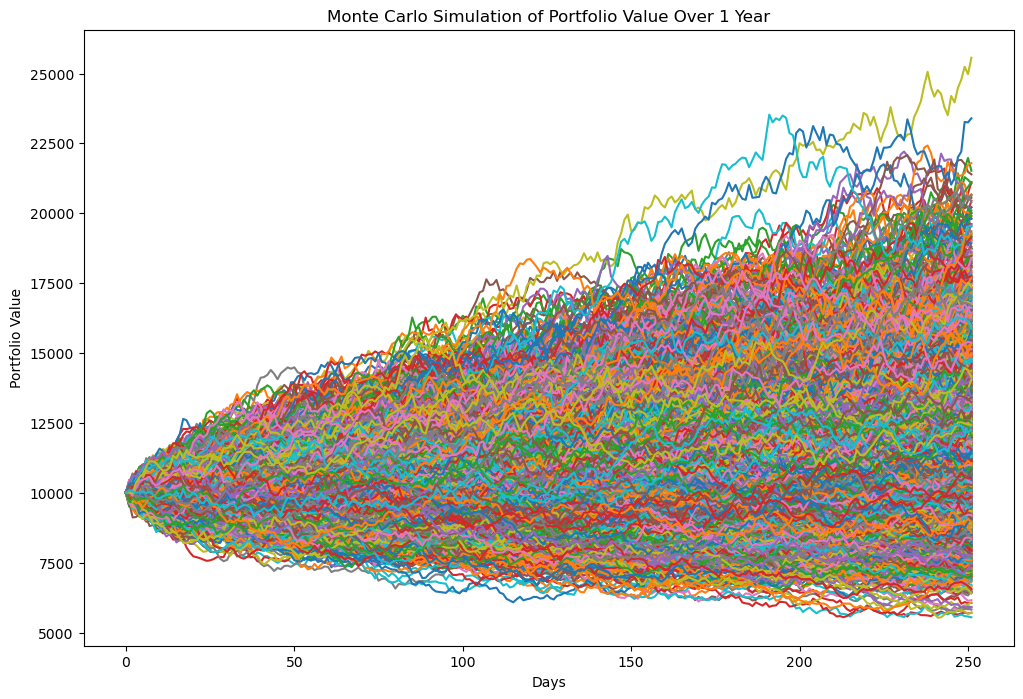

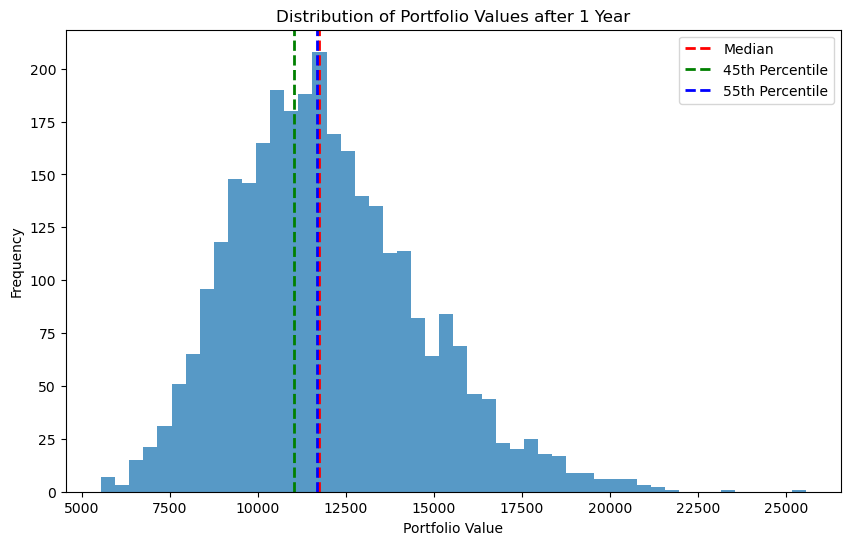

10% Confidence Interval of the Estimated Prices: 11392.60 to 12005.80
5% Confidence Interval of the Estimated Prices: 11558.15 to 11842.14
Expected portfolio value after 1 year: $11722.16
Expected Returns in 1 year time as per 3000 simulations is 17.22 %


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming optimal_portfolio_return, optimal_volatility are defined
days = 252
initial_investment = 10000
future_simulations = 3000
simulation_results = np.zeros((days, future_simulations))

for simulation in range(future_simulations):
    daily_returns = np.random.normal(optimal_portfolio_return / days, optimal_volatility / np.sqrt(days), days)
    price_series = [initial_investment]
    for i in range(1, days):
        price_series.append(price_series[-1] * (1 + daily_returns[i]))
    simulation_results[:, simulation] = price_series

# Plot the simulation results
plt.figure(figsize=(12, 8))
plt.plot(simulation_results)
plt.title('Monte Carlo Simulation of Portfolio Value Over 1 Year')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

# End of year values for all simulations
end_of_year_values = simulation_results[-1, :]


# Calculate the median and the 47.5% - 52.5% confidence interval
median_value = np.median(end_of_year_values)
confidence_interval_45 = np.percentile(end_of_year_values, 45)
confidence_interval_55 = np.percentile(end_of_year_values, 55)

# Plotting the distribution of the portfolio values at the end of the year
plt.figure(figsize=(10, 6))
plt.hist(end_of_year_values, bins=50, alpha=0.75)
plt.axvline(median_value, color='r', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(confidence_interval_475, color='g', linestyle='dashed', linewidth=2, label='45th Percentile')
plt.axvline(confidence_interval_525, color='b', linestyle='dashed', linewidth=2, label='55th Percentile')
plt.legend()
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.title('Distribution of Portfolio Values after 1 Year')
plt.show()

# Calculating the median and confidence interval
median_future_value = np.median(end_of_year_values)
confidence_interval = np.percentile(end_of_year_values, [45,55])
print(f"10% Confidence Interval of the Estimated Prices: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")
confidence_interval = np.percentile(end_of_year_values, [47.5,52.5])
print(f"5% Confidence Interval of the Estimated Prices: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")
print(f"Expected portfolio value after 1 year: ${median_future_value:.2f}")

Exp_returns = ((median_future_value/initial_investment) - 1)*100
print("Expected Returns in 1 year time as per {} simulations is {} %".format(future_simulations,Exp_returns.round(2)))

